In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics

In [ ]:
df = pd.read_csv('../content/starbucks_drinks (6).csv')

In [ ]:
df.columns = ['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       'Total_Fat_g', 'Trans_Fat_g', 'Saturated_Fat_g', 'Sodium_mg',
       'Total_Carbohydrates_g', 'Cholesterol_mg', 'Dietary_Fibre_g',
       'Sugars_g', 'Protein_g', 'Vitamin_A', 'Vitamin_C',
       'Calcium', 'Iron', 'Caffeine_mg']

In [ ]:
# Removing text from numeric columns
df = df[df['Caffeine_mg'] != 'Varies']
df = df[df['Caffeine_mg'] != 'varies']

In [ ]:
df['Caffeine_mg'].replace(np.nan,0,inplace=True)

In [ ]:
# Transforming object to numeric
df["Caffeine_mg"] = pd.to_numeric(df["Caffeine_mg"])

In [ ]:
# Transforming mg columns into g 
df['Sodium_g'] = (df['Sodium_mg'] / 1000)
df['Cholesterol_g'] = (df['Cholesterol_mg'] / 1000)
df['Caffeine_g'] = (df['Caffeine_mg'] / 1000)

In [ ]:
# Transforming Fat column into numeric
df['Total_Fat_g'].replace('3 2', '2',inplace  = True)
df["Total_Fat_g"] = pd.to_numeric(df["Total_Fat_g"])

In [ ]:
df.drop(columns = ['Sodium_mg', 'Cholesterol_mg', 'Vitamin_A', 'Vitamin_C', 'Calcium', 'Iron', 'Caffeine_mg'], inplace=True)

In [ ]:
cat_columns = ['Beverage_category', 'Beverage', 'Beverage_prep']

In [ ]:
noncat_columns = df.drop(columns=cat_columns)

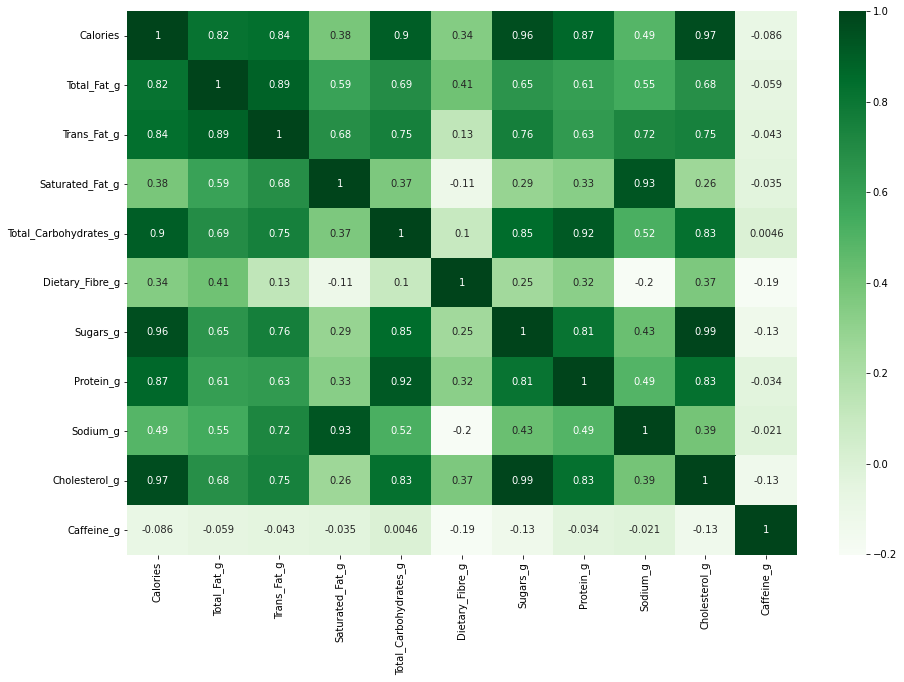

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='Greens')

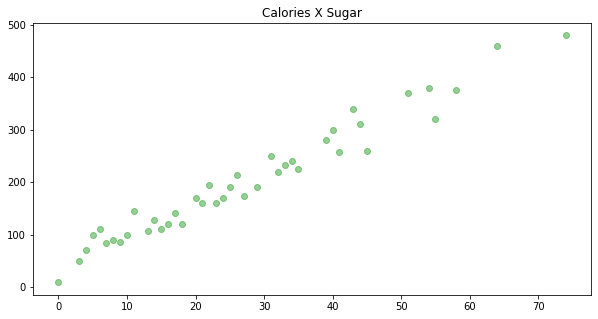

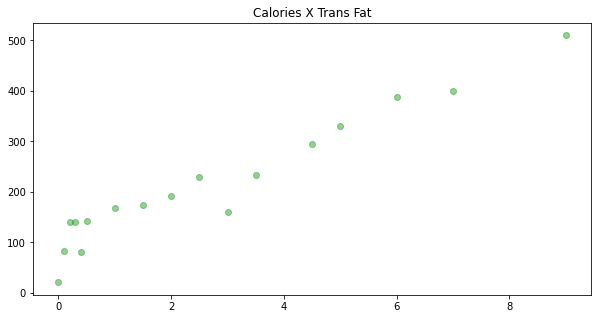

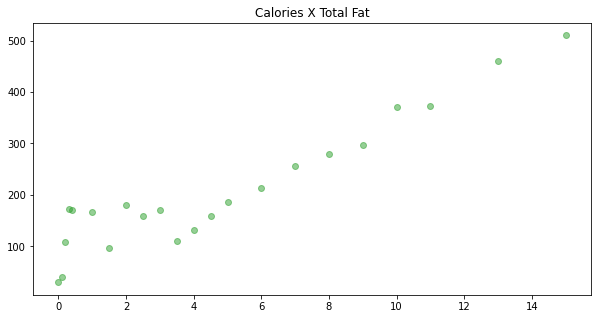

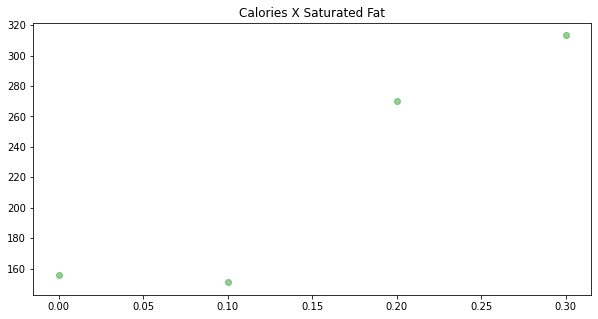

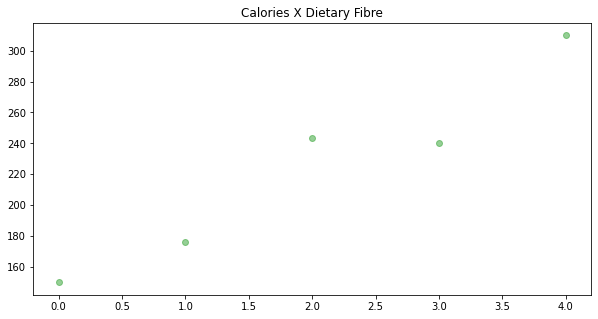

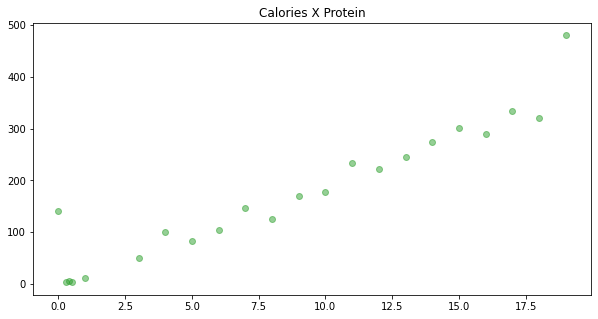

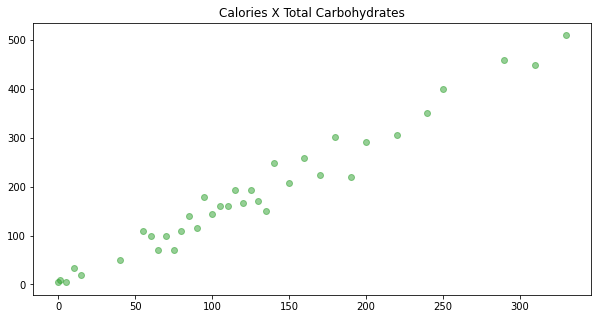

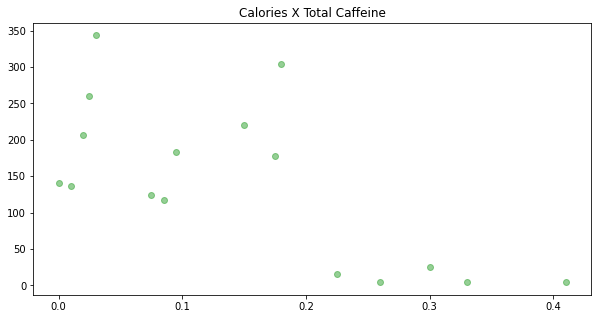

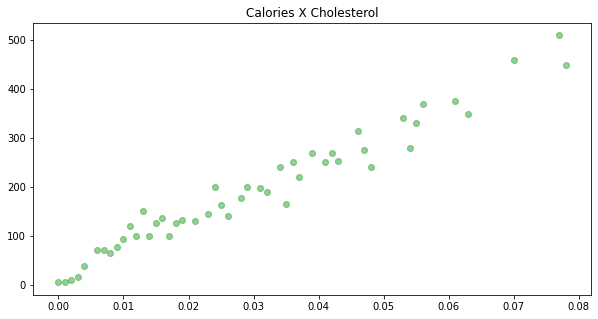

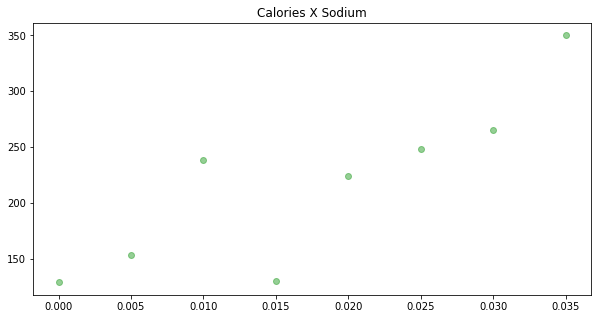

In [ ]:
plt.figure(figsize=(10,5))
x = df.sort_values('Sugars_g')['Sugars_g'].unique()
y = df.groupby('Sugars_g').mean()['Calories']
plt.title('Calories X Sugar')
colors = '#2ca02c'

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

plt.figure(figsize=(10,5))
x = df.sort_values('Trans_Fat_g')['Trans_Fat_g'].unique()
y = df.groupby('Trans_Fat_g').mean()['Calories']
plt.title('Calories X Trans Fat')
colors = '#2ca02c'

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()
plt.figure(figsize=(10,5))
x = df.sort_values('Total_Fat_g')['Total_Fat_g'].unique()
y = df.groupby('Total_Fat_g').mean()['Calories']
plt.title('Calories X Total Fat')
colors = '#2ca02c'

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

plt.figure(figsize=(10,5))
x = df.sort_values('Saturated_Fat_g')['Saturated_Fat_g'].unique()
y = df.groupby('Saturated_Fat_g').mean()['Calories']
plt.title('Calories X Saturated Fat')
colors = '#2ca02c'

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()
plt.figure(figsize=(10,5))
x = df.sort_values('Dietary_Fibre_g')['Dietary_Fibre_g'].unique()
y = df.groupby('Dietary_Fibre_g').mean()['Calories']
plt.title('Calories X Dietary Fibre')
colors = '#2ca02c'

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

plt.figure(figsize=(10,5))
x = df.sort_values('Protein_g')['Protein_g'].unique()
y = df.groupby('Protein_g').mean()['Calories']
plt.title('Calories X Protein')
colors = '#2ca02c'

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()
plt.figure(figsize=(10,5))
x = df.sort_values('Total_Carbohydrates_g')['Total_Carbohydrates_g'].unique()
y = df.groupby('Total_Carbohydrates_g').mean()['Calories']
plt.title('Calories X Total Carbohydrates')
colors = '#2ca02c'

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

plt.figure(figsize=(10,5))
x = df.sort_values('Caffeine_g')['Caffeine_g'].unique()
y = df.groupby('Caffeine_g').mean()['Calories']
plt.title('Calories X Total Caffeine')
colors = '#2ca02c'

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()
plt.figure(figsize=(10,5))
x = df.sort_values('Cholesterol_g')['Cholesterol_g'].unique()
y = df.groupby('Cholesterol_g').mean()['Calories']
plt.title('Calories X Cholesterol')
colors = '#2ca02c'

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

plt.figure(figsize=(10,5))
x = df.sort_values('Sodium_g')['Sodium_g'].unique()
y = df.groupby('Sodium_g').mean()['Calories']
plt.title('Calories X Sodium')
colors = '#2ca02c'

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()


In [ ]:
stb_pred_x = noncat_columns.drop('Calories',axis=1)
stb_pred_y = noncat_columns['Calories']

In [ ]:
from sklearn.model_selection import train_test_split
stb_pred_x_train, stb_pred_x_test, stb_pred_y_train, stb_pred_y_test = train_test_split(
    stb_pred_x, stb_pred_y, test_size=0.20, random_state=0)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
stb_pred_gbr = GradientBoostingRegressor()
stb_pred_gbr_fit =stb_pred_gbr.fit(stb_pred_x_train,stb_pred_y_train) 

In [ ]:
stb_pred_gbr_predict = stb_pred_gbr.predict(stb_pred_x_test)

In [ ]:
stb_pred_gbr_compare = pd.DataFrame({'Actual': stb_pred_y_test, 'Predicted': stb_pred_gbr_predict})
stb_pred_gbr_compare.head(5)

,Actual,Predicted
26,340,334.874624
86,130,140.042588
2,5,5.613360
55,120,117.405646
75,200,203.904730


In [ ]:
print('MSE:', metrics.mean_squared_error(stb_pred_y_test, stb_pred_gbr_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(stb_pred_y_test, stb_pred_gbr_predict)))
print("Accuracy =", round(metrics.r2_score(stb_pred_y_test, stb_pred_gbr_predict), 2))

MSE: 208.41660464852234
RMSE: 14.436641044527024
Accuracy = 0.97


In [ ]:
from sklearn.ensemble import RandomForestRegressor
stb_pred_rfr = RandomForestRegressor()
stb_pred_rfr_fit =stb_pred_rfr.fit(stb_pred_x_train,stb_pred_y_train) 

In [ ]:
stb_pred_rfr_predict = stb_pred_rfr.predict(stb_pred_x_test)

In [ ]:
stb_pred_rfr_compare = pd.DataFrame({'Actual': stb_pred_y_test, 'Predicted': stb_pred_rfr_predict})
stb_pred_rfr_compare.head(5)

,Actual,Predicted
54,150,154.00
166,60,65.45
63,120,119.00
55,120,107.90
127,370,332.40


In [ ]:
#Calculating the Mean Square error, root mean square error, R2 Score
print('MSE:', metrics.mean_squared_error(stb_pred_y_test, stb_pred_rfr_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(stb_pred_y_test, stb_pred_rfr_predict))) 
print("R2 score =", round(metrics.r2_score(stb_pred_y_test, stb_pred_rfr_predict), 2))

MSE: 126.72488611111119
RMSE: 11.257214846981965
R2 score = 0.99


In [ ]:
#Linear regression
from sklearn.linear_model import LinearRegression
stb_pred_lr = LinearRegression()
stb_pred_lr_fit =stb_pred_lr.fit(stb_pred_x_train,stb_pred_y_train) 

In [ ]:
stb_pred_lr_predict = stb_pred_lr.predict(stb_pred_x_test)

In [ ]:
stb_pred_lr_compare = pd.DataFrame({'Actual': stb_pred_y_test, 'Predicted': stb_pred_lr_predict})
stb_pred_lr_compare.head(5)

,Actual,Predicted
54,150,153.857521
166,60,62.921535
63,120,118.102683
55,120,120.773765
127,370,372.276930


In [ ]:
from sklearn import metrics
print('MSE:', metrics.mean_squared_error(stb_pred_y_test, stb_pred_lr_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(stb_pred_y_test, stb_pred_lr_predict))) 
print("R2 score =", round(metrics.r2_score(stb_pred_y_test, stb_pred_lr_predict), 2))

MSE: 32.717447394006534
RMSE: 5.719916729639212
R2 score = 1.0


In [ ]:
#Extreme Gradient Boost
from xgboost.sklearn import XGBRegressor
stb_pred_xgbr = XGBRegressor()
stb_pred_xgbr_fit =stb_pred_xgbr.fit(stb_pred_x_train,stb_pred_y_train) 

[07:17:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
stb_pred_xgbr_predict = stb_pred_xgbr.predict(stb_pred_x_test)

In [ ]:
stb_pred_xgbr_compare = pd.DataFrame({'Actual': stb_pred_y_test, 'Predicted': stb_pred_xgbr_predict})
stb_pred_xgbr_compare.head(5)

,Actual,Predicted
54,150,156.802048
166,60,61.518307
63,120,125.648399
55,120,122.114868
127,370,319.771606


In [ ]:
print('MSE:', metrics.mean_squared_error(stb_pred_y_test, stb_pred_xgbr_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(stb_pred_y_test, stb_pred_xgbr_predict)))
print("R2 score =", round(metrics.r2_score(stb_pred_y_test, stb_pred_xgbr_predict), 2))

MSE: 207.22911538846463
RMSE: 14.395454678073376
R2 score = 0.98


In [ ]:
#SVM
from sklearn.svm import SVR
stb_pred_svr = SVR()
stb_pred_svr_fit =stb_pred_svr.fit(stb_pred_x_train,stb_pred_y_train)

In [ ]:
stb_pred_svr_predict = stb_pred_svr.predict(stb_pred_x_test)

In [ ]:
stb_pred_svr_compare = pd.DataFrame({'Actual': stb_pred_y_test, 'Predicted': stb_pred_svr_predict})
stb_pred_svr_compare.head(5)

,Actual,Predicted
146,140,171.190434
225,200,221.933942
192,180,197.816161
66,180,183.627557
203,280,219.003919


In [ ]:
print('MSE:', metrics.mean_squared_error(stb_pred_y_test, stb_pred_svr_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(stb_pred_y_test, stb_pred_svr_predict)))
print("R2 score =", round(metrics.r2_score(stb_pred_y_test, stb_pred_svr_predict), 2))

MSE: 7233.241812369063
RMSE: 85.0484674310423
R2 score = 0.25


In [ ]:
from tabulate import tabulate
 
# assign data
stb_score_comp = [
    ["Linear Regression", metrics.mean_squared_error(stb_pred_y_test, stb_pred_lr_predict),np.sqrt(metrics.mean_squared_error(stb_pred_y_test, stb_pred_lr_predict)),round(metrics.r2_score(stb_pred_y_test, stb_pred_lr_predict),2)],
    ["Gradient Boosting Regression", metrics.mean_squared_error(stb_pred_y_test, stb_pred_gbr_predict),np.sqrt(metrics.mean_squared_error(stb_pred_y_test, stb_pred_gbr_predict)),round(metrics.r2_score(stb_pred_y_test, stb_pred_gbr_predict),2)],
    ["Random Forest", metrics.mean_squared_error(stb_pred_y_test, stb_pred_rfr_predict),np.sqrt(metrics.mean_squared_error(stb_pred_y_test, stb_pred_rfr_predict)),round(metrics.r2_score(stb_pred_y_test, stb_pred_rfr_predict),2)],
    ["Extreme Gradient Boost", metrics.mean_squared_error(stb_pred_y_test, stb_pred_xgbr_predict),np.sqrt(metrics.mean_squared_error(stb_pred_y_test, stb_pred_xgbr_predict)),round(metrics.r2_score(stb_pred_y_test, stb_pred_xgbr_predict),2)],
    ["SVM", metrics.mean_squared_error(stb_pred_y_test, stb_pred_svr_predict),np.sqrt(metrics.mean_squared_error(stb_pred_y_test, stb_pred_svr_predict)),round(metrics.r2_score(stb_pred_y_test, stb_pred_svr_predict),2)],
    

]
# create header
head = ["Type of Regression", "Mean Square Error", "Root Mean Square Error", "Acuuracy"]
 
# display table
print(tabulate(stb_score_comp, headers=head, tablefmt="grid"))

+------------------------------+---------------------+--------------------------+------------+
| Type of Regression           |   Mean Square Error |   Root Mean Square Error |   Acuuracy |
+==============================+=====================+==========================+============+
| Linear Regression            |             76.0473 |                  8.72051 |       0.99 |
+------------------------------+---------------------+--------------------------+------------+
| Gradient Boosting Regression |            218.791  |                 14.7916  |       0.97 |
+------------------------------+---------------------+--------------------------+------------+
| Random Forest                |            340.74   |                 18.4591  |       0.95 |
+------------------------------+---------------------+--------------------------+------------+
| Extreme Gradient Boost       |            232.061  |                 15.2335  |       0.96 |
+------------------------------+------------------